# Goal: Simple implementation of Keras program to recognise handwritten individual numbers from the images
- Optical Character Recognition (OCR)

#### input: images-minst dataset  consists of images of handwritten digits 0-9 of size 28 x 28 resolution
#### output: reading the handwritten number 
#### logic: we are trying to read handwritten numbers from the images

# STEPS IMPLEMENTED:
1. importing data minst set
2. Normalise input dataset
3. Tilt some of the image to make our model more strong in prediction.
4. Build a DL Model
5. Evaluate the model
6. save model and import it

In [47]:
import tensorflow as tf       #import tensorflow
print(tf.__version__)                #check which version of tenserflow we have downloaded:

1.14.0


In [2]:
#importing dataset
mnist = tf.keras.datasets.mnist # consists of images of handwritten digits 0-9 of size 28 x 28 resolution

In [3]:
A =  tf.keras.datasets

#Now we will feed the pixel values to the neural network and the neural network will o/p which number its

In [4]:
#unpack dataset to train and test the model
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('train dataset:',len(x_train), len(y_train))
print('test dataset:',len(x_test), len(y_test))

train dataset: 60000 60000
test dataset: 10000 10000


In [6]:
x_train[50000] #an array or tensor  
#pixel level representation of an image/a number. Its RGB. But how each pixel value is showing R, G and B?

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
        205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
        254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
x_train[50000].shape  #i.e. 28 rows and on each row we have 28 pixels/columns

(28, 28)

In [8]:
y_train[50000]

3

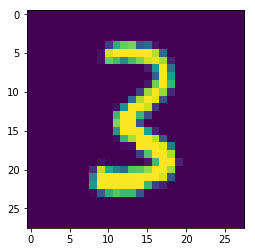

In [9]:
#Visualising the input number by printing it:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[50000]) #it will print colourful image but original image is black and white

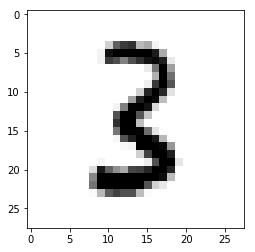

In [10]:
plt.imshow(x_train[50000], cmap = plt.cm.binary) #drawing original image

#if we look at in x_train[50000] o/p array we find numbers ranging from 0 to 255. Therefore we will scale this data to normalise it

# Normalise the data

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)

In [12]:
x_train[50000] #Numbers after normalization ranging from 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

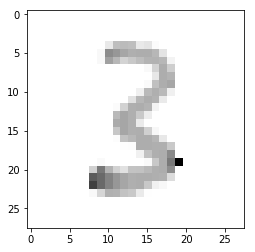

In [13]:
plt.imshow(x_train[50000], cmap = plt.cm.binary) #drawing same number after normalization

## We will tilt some of the input images to make our model more accurate
- to know techniques to rotate ot tilt an image please refer this blog: https://limitlessdatascience.wordpress.com/2019/04/05/__trashed-2/

In [14]:
import cv2
import numpy as np
image = x_train[50000]
image_center = tuple(np.array(image.shape[1::-1]) / 2) # computing image center
rot_mat = cv2.getRotationMatrix2D(image_center, 10, 1.0)
result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

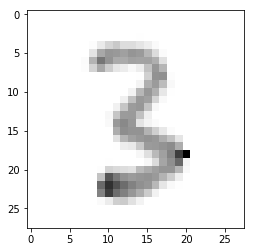

In [15]:
plt.imshow(result, cmap = plt.cm.binary)

In [16]:
i = 0
j = 1    # angle of rotation from 1 to 9
while i < 1000:
    image = x_train[i]
    image_center = tuple(np.array(image.shape[1::-1]) / 2) # computing image center
    rot_mat = cv2.getRotationMatrix2D(image_center, j, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

    x_train[i] = result
    j = j + 1
    if j == 10:
        j = 1
#        j = -10    #rotate in clock wise
#    if j == 0:
#        j = 1    #rotate in anti-clock wise
    i = i + 10

In [17]:
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Building Model
There are two types of model. We are going to use most common sequential model. It is the feedforward 
- A ** feedforward neural network ** is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from recurrent neural networks. 
- The feedforward neural network was the first and simplest type of artificial neural network devised.
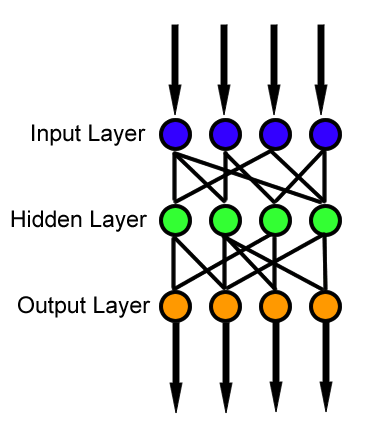
- In a feed forward network information always moves one direction; it never goes backwards.

## Defining Architecture of the Model: Experiment with new model
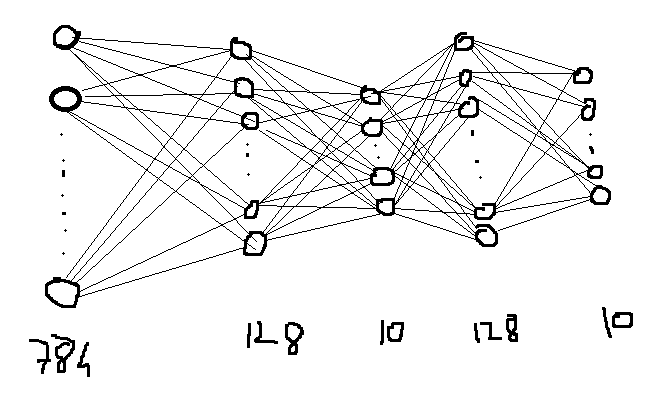

In [18]:
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
model = tf.keras.models.Sequential()

# Adding 1st Layer: Input Layer
# Now we look at the input its multi dimentional 28 x 28 and for our example we will make it flat 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #its Flatten layer 

#NOTE THAT defining input_shape is very important. We need to provide it to the model if not given its not going to show any error but it will show error at the time saving and loading the model

# Adding 2nd Layer: Hidden Layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))   
#Neurons in a layer: 128 , activation function make neuron fire/activate for a certain condition. relu: rectified linear
#we can change it to other activation function to see the results



W0805 14:56:54.981708 139694049056576 deprecation.py:506] From /home/shraddha_sane/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# Layer 3: 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

In [20]:

# Adding 4th Layer: 2nd Hidden Layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 

# Adding 5th Layer: Output Layer
#Since we are going to use classification hence number of neurons will be equal to number of classes/groups we want here its 0-9
#also activation function we want as probability distribution hence we will use softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,468
Trainable params: 104,468
Non-trainable params: 0
_________________________________________________________________


## Define parameters in compile for training our model & Training the model

In [22]:
#pass optimiser, loss matrix: loss is the degree of error. Note that Neural Network always try to minimise the loss. Therefore the way we calculate the error makes huge impact because its whats the loss's relationship to your accuracy of Model 
#there are different optimizers in keras we are going to use adam 
#In loss we can use binary if its Cat Vs Dog type classification. Here we have multiple 0-9 hence we will use following
#also mentioning what metrix we want to track: 
model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
#we will train our model now
%time model.fit(x_train, y_train, epochs  = 100)

Epoch 1/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5165 - acc: 0.8494
Epoch 2/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1672 - acc: 0.9545
Epoch 3/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1135 - acc: 0.9677
Epoch 4/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0840 - acc: 0.9756
Epoch 5/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0667 - acc: 0.9801
Epoch 6/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0506 - acc: 0.9853
Epoch 7/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0414 - acc: 0.9876
Epoch 8/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0346 - acc: 0.9898
Epoch 9/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0285 - acc: 0.9911
Epoch 10/100
60000/60000 [==============================] - 4s 61us/sampl

60000/60000 [==============================] - 4s 62us/sample - loss: 0.0016 - acc: 0.9995
Epoch 80/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0046 - acc: 0.9986
Epoch 81/100
60000/60000 [==============================] - 4s 63us/sample - loss: 5.1361e-04 - acc: 0.9999
Epoch 82/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0048 - acc: 0.9986
Epoch 83/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0016 - acc: 0.9995
Epoch 84/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0029 - acc: 0.9992
Epoch 85/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0031 - acc: 0.9991
Epoch 86/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0028 - acc: 0.9993
Epoch 87/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0026 - acc: 0.9995
Epoch 88/100
60000/60000 [==============================] - 4s 61us/sampl

#In training we achieved accuracy = 0.9773 and loss = 0.0735

# Now we will evaluate 
(always check whther our model is overfitting or not)

In [23]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.2115 - acc: 0.9741
0.21150368001153694 0.9741


# Identify the number for Test sample 1

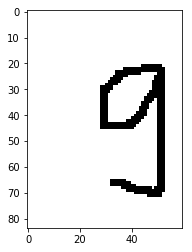

In [24]:
import cv2
image = cv2.imread('9.png')
plt.close()
plt.imshow(image)

In [25]:
image.shape   #but out model takes input as 28 x 28 images only. Hence downscale the sample image

(84, 60, 3)

In [26]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Or directly convert convering BGR to GRAY
image.shape  # became 1 channel i.e. Gray image

(84, 60)

In [27]:
basewidth = 28
hsize = 28
dim = (basewidth, hsize)

In [28]:
DownImage = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [29]:
DownImage.shape

(28, 28)

In [30]:
DownImage = DownImage.reshape(1, 28,28)  #this step is important otherwise you will get an error at the time of prediction

In [31]:
import numpy as np

In [32]:
np.argsort(model.predict(DownImage))[0][0]   # highest probability index is the output number

3

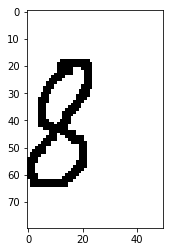

In [33]:
image = cv2.imread('8.png')
plt.close()
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
basewidth = 28
hsize = 28
dim = (basewidth, hsize)
DownImage = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
DownImage = DownImage.reshape(1, 28,28)

In [46]:
np.argsort(model.predict(DownImage))[0]   # highest probability index is the output number

array([3, 7, 9, 5, 1, 8, 2, 0, 4, 6])

##### OBSERVATION: In training we achieved accuracy = 0.9726 ~ training accuracy (0.9773) and loss = 0.0872 > training_loss (0.0735) Since difference is not too much hence its not overfitting

# Now we will save the model
- we can import the model and use it later 

!pwd #current directory path

In [35]:
PathToSave = "./"

#### Saving and loading is not working properly reasons:
#1. in the input layer we have to mention input shape

In [ ]:
tf.keras.models.save_model(
    model,
    PathToSave+"Handwritten_number_reader.model",
    overwrite=True,
    include_optimizer=True
)

In [ ]:
model.save(PathToSave+'Handwritten_number_reader.model') #Or use this line of code to save the model

In [38]:
del model  # deletes the existing model

# Reload the model and test it again

In [44]:
from keras.models import load_model
model2 = tf.keras.models.load_model(PathToSave+"Handwritten_number_reader.model")

In [45]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,468
Trainable params: 104,468
Non-trainable params: 0
_________________________________________________________________


In [41]:
val_loss, val_acc = model2.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.2147 - acc: 0.9749
0.21467585878383835 0.9749


In [42]:
del model2  # deletes the existing model

# Later you can load json and create model

In [ ]:
model3 = tf.keras.models.load_model("partly_trained.model")
val_loss, val_acc = model3.evaluate(x_test, y_test)
print(val_loss, val_acc)

# What to do next?
- study available models in layering
- study techniques to check whether model is overfitting or not? -keras's inbuilt functions, tenserflow's own functions
- study techniques and tools used for image, video preprocessing (toughest part in Deep Learning)